##**Telecom X:** – Parte 2: Prevendo Churn


##🎯 Missão
Sua nova missão é desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.

A empresa quer antecipar o problema da evasão, e cabe a você construir um pipeline robusto para essa etapa inicial de modelagem.

##🧠 Objetivos do Desafio
Preparar os dados para a modelagem (tratamento, encoding, normalização).

Realizar análise de correlação e seleção de variáveis.

Treinar dois ou mais modelos de classificação.

Avaliar o desempenho dos modelos com métricas.

Interpretar os resultados, incluindo a importância das variáveis.

Criar uma conclusão estratégica apontando os principais fatores que influenciam a evasão.

🧰 O que você vai praticar
✅ Pré-processamento de dados para Machine Learning
✅ Construção e avaliação de modelos preditivos
✅ Interpretação dos resultados e entrega de insights
✅ Comunicação técnica com foco estratégico

🚀 Você agora é: Analista de Machine Learning Júnior
A Telecom X está confiando na sua entrega para dar os próximos passos em direção a uma solução de inteligência preditiva eficaz.



---





##Importação das bibliotecas

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [83]:
dados = pd.read_csv('/content/df_final.csv')

In [84]:
with open('/content/TelecomX_dicionario.md', 'r') as f:
    markdown_content = f.read()

print(markdown_content)

#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa 
* `gender`: gênero (masculino e feminino) 
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos 
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico 
* `MultipleLines`: assisnatura de mais de uma linha de telefone 
* `InternetService`: assinatura de um provedor internet 
* `OnlineSecurity`: assinatura adicional de segurança online 
* `OnlineBackup`: assinatura adicional de backup online 
* `DeviceProtection`: assinatura adicional de proteção no dispositivo 
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo 
* `StreamingMovies`: assinatura de streaming de filmes 
* `Contract`: tipo de co

##Inspeção dos dados

In [85]:
dados.shape

(7043, 22)

In [86]:
dados.head(5)

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total,contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [87]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer_gender            7043 non-null   object 
 3   customer_SeniorCitizen     7043 non-null   int64  
 4   customer_Partner           7043 non-null   object 
 5   customer_Dependents        7043 non-null   object 
 6   customer_tenure            7043 non-null   int64  
 7   phone_PhoneService         7043 non-null   object 
 8   phone_MultipleLines        7043 non-null   object 
 9   internet_InternetService   7043 non-null   object 
 10  internet_OnlineSecurity    7043 non-null   object 
 11  internet_OnlineBackup      7043 non-null   object 
 12  internet_DeviceProtection  7043 non-null   object 
 13  internet_TechSupport       7043 non-null   objec

In [88]:
dados.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total,contas_Diarias
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,2.158675
std,0.368612,24.559481,30.090047,2266.771362,1.003088
min,0.000000,0.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.500000,401.450000,1.180000
50%,0.000000,29.000000,70.350000,1397.475000,2.340000
75%,0.000000,55.000000,89.850000,3794.737500,2.990000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


In [89]:
dados.isnull().sum()

,0
customerID,0
Churn,0
customer_gender,0
customer_SeniorCitizen,0
customer_Partner,0
customer_Dependents,0
customer_tenure,0
phone_PhoneService,0
phone_MultipleLines,0
internet_InternetService,0


In [90]:
dados.nunique()

,0
customerID,7043
Churn,2
customer_gender,2
customer_SeniorCitizen,2
customer_Partner,2
customer_Dependents,2
customer_tenure,73
phone_PhoneService,2
phone_MultipleLines,3
internet_InternetService,3


#🛠️ Preparação dos **Dados**

##Remoção de Colunas Irrelevantes

Elimine colunas que não trazem valor para a análise ou para os modelos preditivos, como identificadores únicos (por exemplo, o ID do cliente). Essas colunas não ajudam na previsão da evasão e podem até prejudicar o desempenho dos modelos.

In [91]:
dados_final = dados.drop(['customerID','account_Charges_Total', 'contas_Diarias' ], axis=1)

In [92]:
dados_final.nunique()

,0
Churn,2
customer_gender,2
customer_SeniorCitizen,2
customer_Partner,2
customer_Dependents,2
customer_tenure,73
phone_PhoneService,2
phone_MultipleLines,3
internet_InternetService,3
internet_OnlineSecurity,3


In [93]:
analise_colunas= [
    "phone_PhoneService", "phone_MultipleLines",
    "internet_InternetService", "internet_OnlineSecurity",
    "internet_OnlineBackup", "internet_DeviceProtection",
    "internet_TechSupport", "internet_StreamingTV",
    "internet_StreamingMovies", "account_Contract"
]

for col in analise_colunas:
    print(f"{col}: {dados_final[col].unique()}")


phone_PhoneService: ['Yes' 'No']
phone_MultipleLines: ['No' 'Yes' 'No phone service']
internet_InternetService: ['DSL' 'Fiber optic' 'No']
internet_OnlineSecurity: ['No' 'Yes' 'No internet service']
internet_OnlineBackup: ['Yes' 'No' 'No internet service']
internet_DeviceProtection: ['No' 'Yes' 'No internet service']
internet_TechSupport: ['Yes' 'No' 'No internet service']
internet_StreamingTV: ['Yes' 'No' 'No internet service']
internet_StreamingMovies: ['No' 'Yes' 'No internet service']
account_Contract: ['One year' 'Month-to-month' 'Two year']




---



##Encoding

Transforme as variáveis categóricas em formato numérico para torná-las compatíveis com algoritmos de machine learning. Utilize um método de codificação adequado, como o one-hot encoding.


In [94]:
colunas_categoricas =dados_final.select_dtypes(include=['object']).columns
print(colunas_categoricas)

Index(['Churn', 'customer_gender', 'customer_Partner', 'customer_Dependents',
       'phone_PhoneService', 'phone_MultipleLines', 'internet_InternetService',
       'internet_OnlineSecurity', 'internet_OnlineBackup',
       'internet_DeviceProtection', 'internet_TechSupport',
       'internet_StreamingTV', 'internet_StreamingMovies', 'account_Contract',
       'account_PaperlessBilling', 'account_PaymentMethod'],
      dtype='object')


In [95]:
dados_final = pd.get_dummies(dados_final, columns=colunas_categoricas, drop_first=True)

In [96]:
dados_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 30 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   customer_SeniorCitizen                         7043 non-null   int64  
 1   customer_tenure                                7043 non-null   int64  
 2   account_Charges_Monthly                        7043 non-null   float64
 3   Churn_Yes                                      7043 non-null   bool   
 4   customer_gender_Male                           7043 non-null   bool   
 5   customer_Partner_Yes                           7043 non-null   bool   
 6   customer_Dependents_Yes                        7043 non-null   bool   
 7   phone_PhoneService_Yes                         7043 non-null   bool   
 8   phone_MultipleLines_No phone service           7043 non-null   bool   
 9   phone_MultipleLines_Yes                        7043 

In [97]:
dados_final.head(5)

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,Churn_Yes,customer_gender_Male,customer_Partner_Yes,customer_Dependents_Yes,phone_PhoneService_Yes,phone_MultipleLines_No phone service,phone_MultipleLines_Yes,...,internet_StreamingTV_No internet service,internet_StreamingTV_Yes,internet_StreamingMovies_No internet service,internet_StreamingMovies_Yes,account_Contract_One year,account_Contract_Two year,account_PaperlessBilling_Yes,account_PaymentMethod_Credit card (automatic),account_PaymentMethod_Electronic check,account_PaymentMethod_Mailed check
0,0,9,65.6,False,False,True,True,True,False,False,...,False,True,False,False,True,False,True,False,False,True
1,0,9,59.9,False,True,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,True
2,0,4,73.9,True,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
3,1,13,98.0,True,True,True,False,True,False,False,...,False,True,False,True,False,False,True,False,True,False
4,1,3,83.9,True,False,True,False,True,False,False,...,False,True,False,False,False,False,True,False,False,True


In [98]:
dados_final.shape

(7043, 30)



---



##Verificação da Proporção de Evasão

Calcule a proporção de clientes que evadiram em relação aos que permaneceram ativos. Avalie se há desequilíbrio entre as classes, o que pode impactar modelos preditivos e a análise de resultados.



In [99]:
dados_final['Churn_Yes'].value_counts()

,count
Churn_Yes,
False,5174
True,1869


##Balanceamento de Classes

Caso queira aprofundar a análise, aplique técnicas de balanceamento como undersampling ou oversampling. Em situações de forte desbalanceamento, ferramentas como o SMOTE podem ser úteis para gerar exemplos sintéticos da classe minoritária.



In [100]:
dados_final['Churn_Yes'].value_counts(normalize=True)

,proportion
Churn_Yes,
False,0.73463
True,0.26537


##Normalização ou Padronização

Avalie a necessidade de normalizar ou padronizar os dados, conforme os modelos que serão aplicados.
Modelos baseados em distância, como KNN, SVM, Regressão Logística e Redes Neurais, requerem esse pré-processamento.
Já modelos baseados em árvore, como Decision Tree, Random Forest e XGBoost, não são sensíveis à escala dos dados.



In [101]:
scaler = StandardScaler()  # ou MinMaxScaler()
X_balanceado_scaled = scaler.fit_transform(X_balanceado)


#🎯 Correlação e Seleção de Variáveis

##Análise de Correlação

Visualize a matriz de correlação para identificar relações entre variáveis numéricas. Observe especialmente quais variáveis apresentam maior correlação com a evasão, pois elas podem ser fortes candidatas para o modelo preditivo.

In [102]:
correlacao = dados_final.corr()

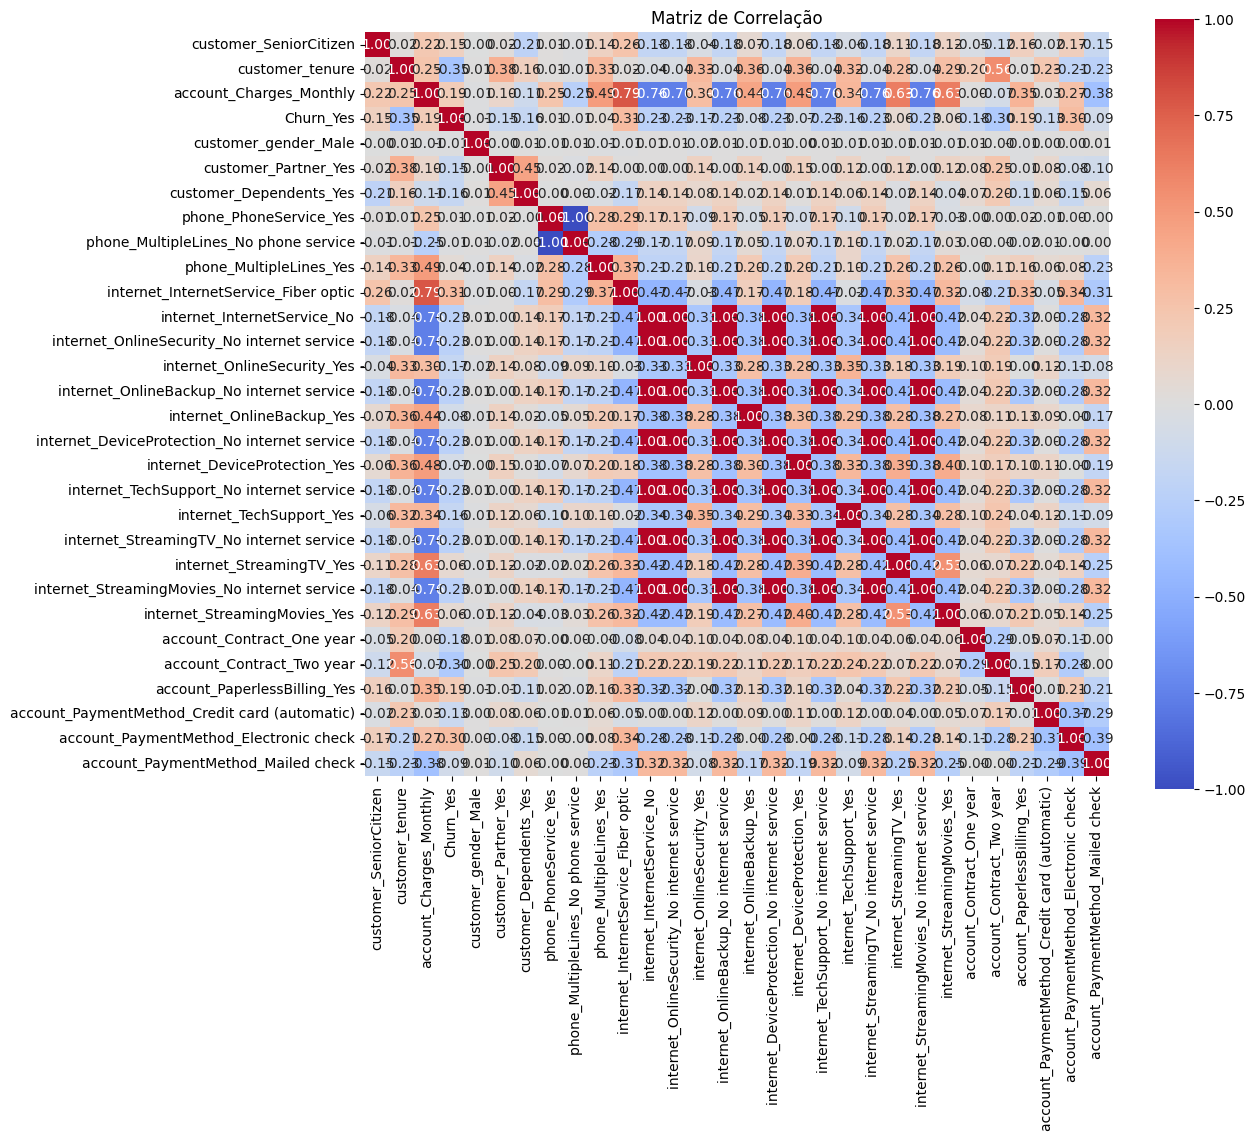

In [103]:
plt.figure(figsize=(12,10))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Matriz de Correlação")
plt.show()


##Como interpretar?
Cores:

Vermelho forte → correlação positiva alta (próximo de +1).

Azul forte → correlação negativa alta (próximo de -1).

Cores claras → correlação próxima de 0, ou seja, pouca relação linear.

Agrupamentos (dendrogramas):

Variáveis que ficam próximas nos dendrogramas têm padrões semelhantes de correlação com as outras variáveis.

Isso ajuda a identificar grupos de variáveis que podem estar medindo aspectos semelhantes.

Na matriz:

Diagonal sempre 1.00 (uma variável correlaciona perfeitamente consigo mesma).

Observe especialmente as correlações com Churn_Yes para saber quais variáveis influenciam mais a evasão.



---



##Análises Direcionadas

Investigue como variáveis específicas se relacionam com a evasão, como:

Tempo de contrato × Evasão

Total gasto × Evasão

Utilize gráficos como boxplots ou dispersão (scatter plots) para visualizar padrões e possíveis tendências.

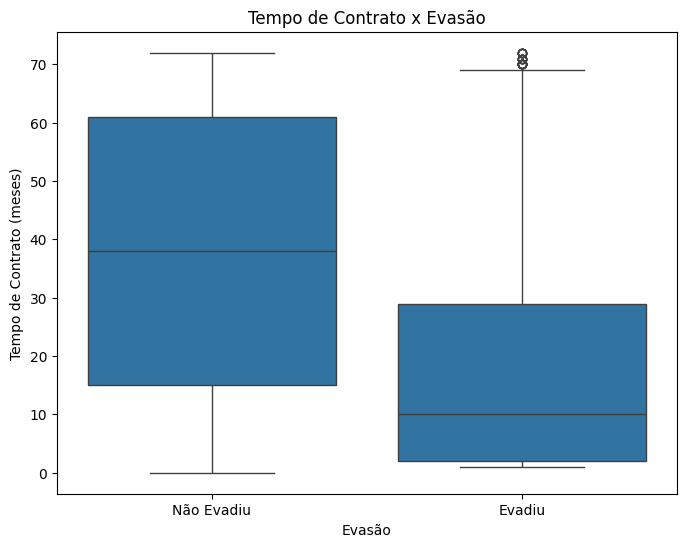

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='Churn_Yes', y='customer_tenure', data=dados_final)
plt.xticks([0,1], ['Não Evadiu', 'Evadiu'])
plt.title('Tempo de Contrato x Evasão')
plt.xlabel('Evasão')
plt.ylabel('Tempo de Contrato (meses)')
plt.show()




---



# 🤖 Modelagem Preditiva

##Separação de Dados

Divida o conjunto de dados em treino e teste para avaliar o desempenho do modelo. Uma divisão comum é 70% para treino e 30% para teste, ou 80/20, dependendo do tamanho da base de dados.

In [105]:
X = dados_final.drop('Churn_Yes', axis=1)
y = dados_final['Churn_Yes']

In [106]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


##Train/Test Split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


##SMOTE

In [108]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)


##Escalonar

In [109]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)


#Criação de Modelos

Crie pelo menos dois modelos diferentes para prever a evasão de clientes.

Um modelo pode exigir normalização, como Regressão Logística ou KNN.

O outro modelo pode não exigir normalização, como Árvore de Decisão ou Random Forest.

💡 A escolha de aplicar ou não a normalização depende dos modelos selecionados. Ambos os modelos podem ser criados sem normalização, mas a combinação de modelos com e sem normalização também é uma opção.

Justifique a escolha de cada modelo e, se optar por normalizar os dados, explique a necessidade dessa etapa.

##Modelo 1 — Logistic Regression


Logistic Regression:

              precision    recall  f1-score   support

       False       0.86      0.81      0.84      1552
        True       0.55      0.64      0.59       561

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.78      0.77      0.77      2113



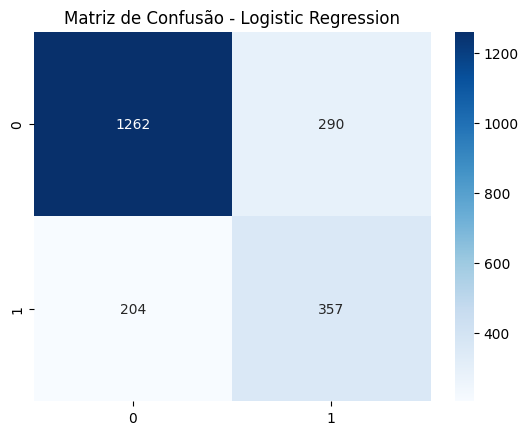

In [110]:
# Treinamento
modelo_lr = LogisticRegression(random_state=42, max_iter=500)
modelo_lr.fit(X_train_scaled, y_train_res)

# Predições
y_pred_lr = modelo_lr.predict(X_test_scaled)

# Avaliação
print("Logistic Regression:\n")
print(classification_report(y_test, y_pred_lr))

sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusão - Logistic Regression")
plt.show()


##Modelo 2 — Random Forest

Random Forest:

              precision    recall  f1-score   support

       False       0.84      0.84      0.84      1552
        True       0.56      0.57      0.57       561

    accuracy                           0.77      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113



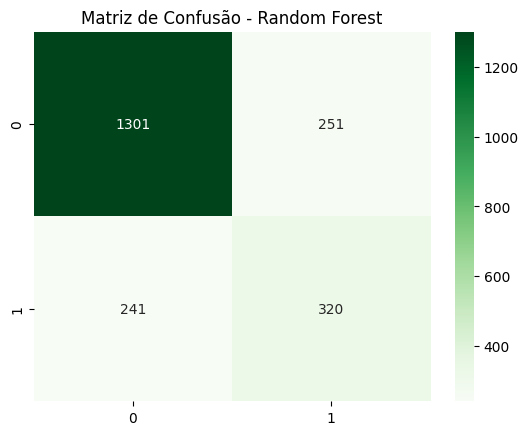

In [111]:
# Treinamento
modelo_rf = RandomForestClassifier(random_state=42, n_estimators=200)
modelo_rf.fit(X_train_res, y_train_res)

# Predições
y_pred_rf = modelo_rf.predict(X_test)

# Avaliação
print("Random Forest:\n")
print(classification_report(y_test, y_pred_rf))

sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Matriz de Confusão - Random Forest")
plt.show()


#Avaliação dos Modelos

Avalie cada modelo utilizando as seguintes métricas:

Acurácia

Precisão

Recall

F1-score

Matriz de confusão

Em seguida, faça uma análise crítica e compare os modelos:

Qual modelo teve o melhor desempenho?

Algum modelo apresentou overfitting ou underfitting? Se sim, considere as possíveis causas e ajustes:

Overfitting: Quando o modelo aprende demais sobre os dados de treino, perdendo a capacidade de generalizar para novos dados. Considere reduzir a complexidade do modelo ou aumentar os dados de treino.

Underfitting: Quando o modelo não captura bem as tendências dos dados, indicando que está muito simples. Tente aumentar a complexidade do modelo ou ajustar seus parâmetros.

##Comparação entre os modelos

In [112]:
from sklearn.metrics import accuracy_score

print(f"Acurácia Logistic Regression: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Acurácia Random Forest: {accuracy_score(y_test, y_pred_rf):.4f}")


Acurácia Logistic Regression: 0.7662
Acurácia Random Forest: 0.7672


#📋  Interpretação e Conclusões

Elaborem um relatório detalhado, destacando os fatores que mais influenciam a evasão, com base nas variáveis selecionadas e no desempenho de cada modelo.

Identifiquem os principais fatores que afetam a evasão de clientes e proponham estratégias de retenção com base nos resultados obtidos.

In [113]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def avaliar(nome, y_true, y_pred):
    print(f'== {nome} ==')
    print('Acurácia :', round(accuracy_score(y_true, y_pred), 4))
    print('Precisão :', round(precision_score(y_true, y_pred), 4))
    print('Recall   :', round(recall_score(y_true, y_pred), 4))
    print('F1-score :', round(f1_score(y_true, y_pred), 4))
    print('\nMatriz de Confusão:\n', confusion_matrix(y_true, y_pred))
    print('\nRelatório:\n', classification_report(y_true, y_pred))

avaliar('Logistic Regression', y_test, y_pred_lr)
avaliar('Random Forest', y_test, y_pred_rf)


== Logistic Regression ==
Acurácia : 0.7662
Precisão : 0.5518
Recall   : 0.6364
F1-score : 0.5911

Matriz de Confusão:
 [[1262  290]
 [ 204  357]]

Relatório:
               precision    recall  f1-score   support

       False       0.86      0.81      0.84      1552
        True       0.55      0.64      0.59       561

    accuracy                           0.77      2113
   macro avg       0.71      0.72      0.71      2113
weighted avg       0.78      0.77      0.77      2113

== Random Forest ==
Acurácia : 0.7672
Precisão : 0.5604
Recall   : 0.5704
F1-score : 0.5654

Matriz de Confusão:
 [[1301  251]
 [ 241  320]]

Relatório:
               precision    recall  f1-score   support

       False       0.84      0.84      0.84      1552
        True       0.56      0.57      0.57       561

    accuracy                           0.77      2113
   macro avg       0.70      0.70      0.70      2113
weighted avg       0.77      0.77      0.77      2113

